<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [2]:
df = pd.read_csv('states_edu.csv')

In [3]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


Chosen test: **<hit `Enter` to edit>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [4]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [23]:
#dropped these because filling in NaN was too complex of a task for the time I alotted
df = df.dropna(subset=['AVG_MATH_8_SCORE','ENROLL']) 

In [24]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT']= df.SUPPORT_SERVICES_EXPENDITURE / df.ENROLL

<h2> Feature Selection </h2>

_Use this space to modify or create features_

8th grade average math scores

Final feature list: **<LIST FEATURES HERE\>**<br>
['TOTAL_REVENUE','ENROLL','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','YEAR']

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**<br>
I chose these features because collectively they frame how investment per student over time impacts scores.

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Distribution of AVG 8th grade math scores')

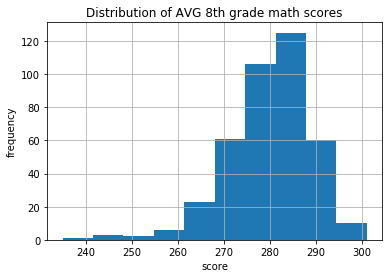

In [25]:
df.AVG_MATH_8_SCORE.hist()
plt.xlabel('score')
plt.ylabel('frequency')
plt.title('Distribution of AVG 8th grade math scores')

Close to a normal distribution, with a large center of mass arount 285.

Visualization 2

Text(0.5, 1.0, '8th grade math scores over time')

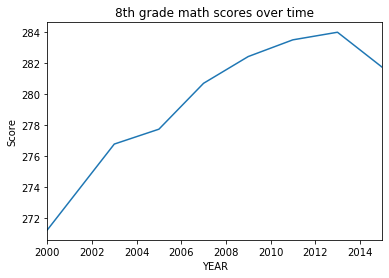

In [26]:
df.groupby('YEAR').AVG_MATH_8_SCORE.mean().plot()
plt.ylabel('Score')
plt.title('8th grade math scores over time')

Text(0.5, 1.0, "State's 8th grade math scores over time")

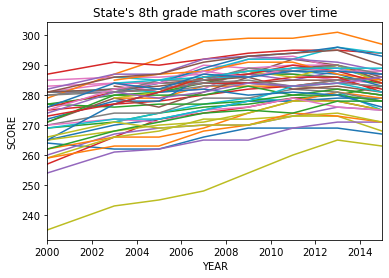

In [28]:
df.set_index('YEAR').groupby('STATE').AVG_MATH_8_SCORE.plot()
plt.ylabel('SCORE')
plt.title("State's 8th grade math scores over time")

Based on the two plots, it appears that on average math scores saw a meaningful decline in 2013. Whereas between 2000 and 2012 there was an improvement trend.

In [10]:
#pip install --upgrade scikit-learn

In [11]:
# import your sklearn class here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [12]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
       'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'],
      dtype='object')

In [30]:
x = df[['TOTAL_REVENUE','ENROLL','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[x.index]['AVG_MATH_8_SCORE'] #.dropna()#.fillna(np.mean(df['AVG_MATH_8_SCORE']))

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [32]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [33]:
print(f'Model Intercept: {model.intercept_}')
print(f'Model Coefficient: {model.coef_}')
print(f'Mean Error: {np.mean(model.predict(x_test)-y_test)}')
print(f'Mean Squared Error: {np.mean((model.predict(x_test)-y_test)**2)**.5}')

Model Intercept: -1339.103201735226
Model Coefficient: [ 4.58763802e-07 -5.64088174e-06 -1.43399476e+00  8.08958497e-01]
Mean Error: -0.18436183569386533
Mean Squared Error: 8.311001333402992


Text(0, 0.5, 'AVG_MATH_8_SCORE')

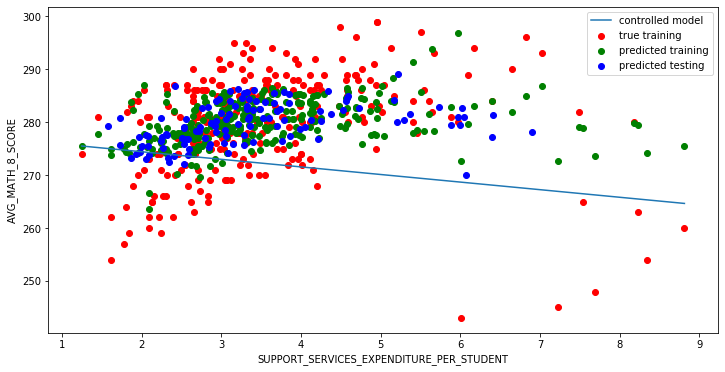

In [34]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'
col_index = x_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(x_train[col_name], y_train, color = "red")
plt.scatter(x_train[col_name], model.predict(x_train), color = "green")
plt.scatter(x_test[col_name], model.predict(x_test), color = "blue")

new_x = np.linspace(x_train[col_name].min(),x_train[col_name].max(),200)
intercept = model.predict([x_train.sort_values(col_name).iloc[0]]) - x_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**

After running an initial analysis it appears that a polynomial regression model would be a better fit. That said there does seem to be a diminishing return on investment in support services between 4 and 5. Revising the model would lower the prediction error and provide a vertex which would indicate a diminishing return threshold. Exploring other feature selections and methods of filling in missing values would also be worth undertaking.